# Supervised Machine Learning
* K-Nearest Neighbors
* Linear Models
    * Linear Regression
    * Ridge
    * Lasso
    * ElasticNet
    * Linear models for classification
    * Linear models for multiclass classification
* Naive Bayes Classifiers
* Decision trees
    * Decission Tree Classifier
    * Decission Tree Regressor
* Ensembles of Decision Trees
    * Random Forests
    * Gradient Boosted Regression Trees
* Kernelized Support Vector Machines

## Glossary
* Feature: characteristic of the target
* Target: value to be predicted
* Regularization: explicitly restricting a model to avoid overfitting

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from IPython.display import display
%matplotlib inline

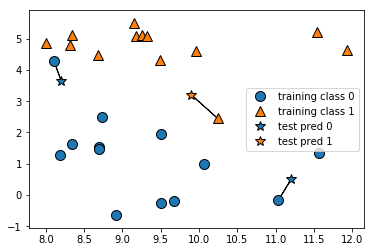

In [54]:
mglearn.plots.plot_knn_classification(n_neighbors=1)
plt.show()

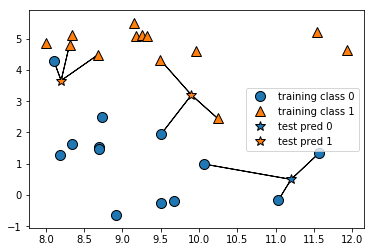

In [55]:
mglearn.plots.plot_knn_classification(n_neighbors=3)
plt.show()

## K-nearest neighbors

### Forge dataset example (made-up)

In [56]:
#Import the data splitter and the Estimator class for this algorithm
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Call the forge dataset and split it into training and testing
X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

#Create an instance of the class
clf = KNeighborsClassifier(n_neighbors = 3)

#Fit the classifier
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [57]:
print("Test set predictions: ", clf.predict(X_test))
print("Test set accuracy: {:.2f}".format(clf.score(X_test, y_test)))

Test set predictions:  [1 0 1 0 1 0 0]
Test set accuracy: 0.86


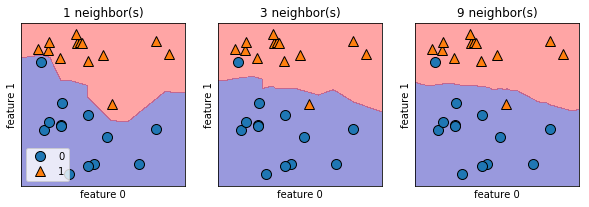

In [58]:
fig, axes = plt.subplots(1, 3, figsize = (10,3))

#Graph the regions that belong to each of the two classes in forge dataset
for n_neighbors, ax in zip([1,3,9], axes):
    #The fit method returns the object self, so we can instantiate
    #And fit in one line
    clf = KNeighborsClassifier(n_neighbors = n_neighbors).fit(X,y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps = 0.5, ax=ax, alpha = 0.4)
    mglearn.discrete_scatter(X[:,0], X[:,1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)
plt.show()

### Breast cancer example (real world)

In [59]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
print(cancer.keys())
print("Target names: ", cancer['target_names'])
print("\nFeatures: ", cancer["feature_names"])
print("\nDescription:", cancer['DESCR'])

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
Target names:  ['malignant' 'benign']

Features:  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']

Description: .. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - ra

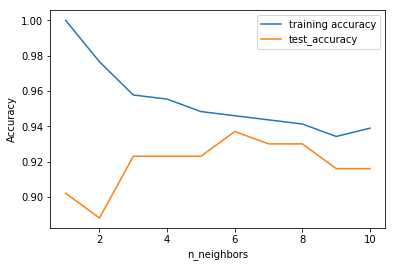

In [60]:
X_train, X_test, y_train, y_test = train_test_split(cancer['data'], cancer['target'],
                                                    stratify = cancer['target'], random_state=66)

training_accuracy = []
test_accuracy = []
#Try n_neighbors from 1 to 10
neighbors_settings= range(1,11)

for n_neighbors in neighbors_settings:
    # Call the estimator class
    clf = KNeighborsClassifier(n_neighbors = n_neighbors).fit(X_train, y_train)
    #Record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    #Recrd generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))
    
#Plot it :v
plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
plt.plot(neighbors_settings, test_accuracy, label ="test_accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()

### K-neighbors regressions
It is implemented using the KNeighborsRegressor class in scikit-learn

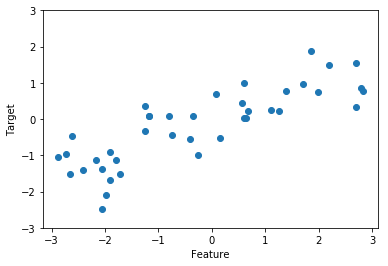

In [61]:
# Load the waves data set
X,y = mglearn.datasets.make_wave(n_samples=40)

plt.plot(X, y, 'o')
plt.ylim(-3,3)
plt.xlabel("Feature")
plt.ylabel("Target")
plt.show()

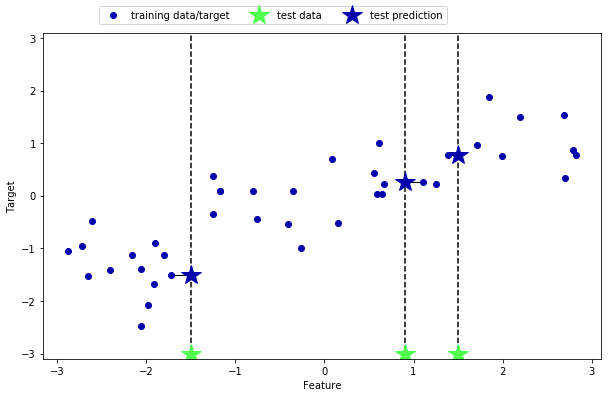

In [62]:
# Plot a sample predictions graph with a single closest neighbor
mglearn.plots.plot_knn_regression(n_neighbors = 1)

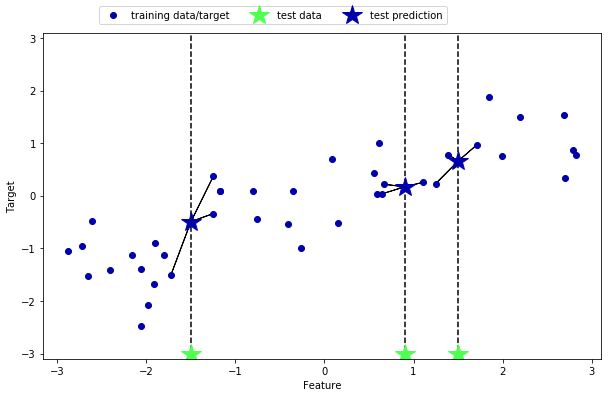

In [63]:
# Plot a sample prediction graph with several closest neighbors
mglearn.plots.plot_knn_regression(n_neighbors = 3
                                 )

In [64]:
# Import the Estimator class
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples = 40)

#split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state= 0)

#Instantiate the model and set number of neighbors to 3 and fit the model
reg = KNeighborsRegressor(n_neighbors = 3).fit(X_train, y_train)


In [65]:
# Make predictions on the test set:
print("Test set predictions:\n", reg.predict(X_test))

Test set predictions:
 [-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


#### Note:
Regression models use R^2 to calculate the goodness of a prediction. A value of 1 correspondes to a perfect prediction, and a value of 0 corresponds to a constant model that just predicts the mean of the training set responses (y_train)

In [66]:
print("Test set R^2: {:.2f}".format(reg.score(X_test, y_test)))

Test set R^2: 0.83


Now we can visualize how the predictions of the model look.

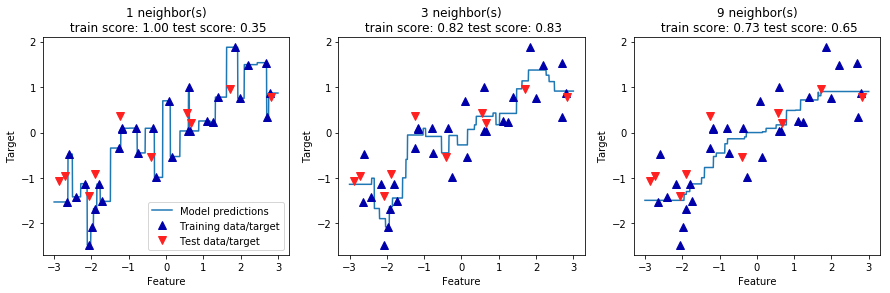

In [67]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# create 1,000 data points, evenly spaced between -3 and 3
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    # make predictions using 1, 3, or 9 neighbors
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)

    ax.set_title(
        "{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(
            n_neighbors, reg.score(X_train, y_train),
            reg.score(X_test, y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
axes[0].legend(["Model predictions", "Training data/target",
                "Test data/target"], loc="best")
plt.show()

## Linear Models

There are a lot of linear models. They differ in two ways:
* The way in which they measure how well a particular combination of coefficients and intercept fits the training data.
* If and what kind of regularization they use

w[0]: 0.393906  b: -0.031804


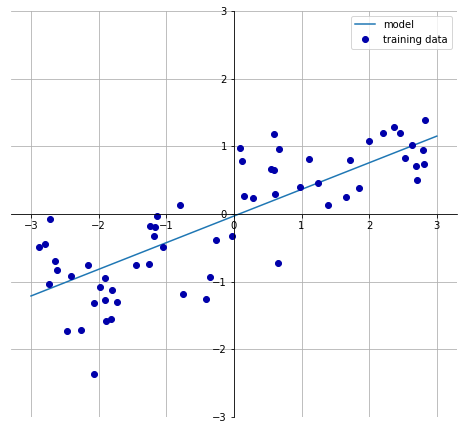

In [68]:
#Plot a linear Regression model with the wave dataset
mglearn.plots.plot_linear_regression_wave()

### Linear Regression (aka Ornidary Least Squares)

#### Apply it on the waves dataset

In [69]:
from sklearn.linear_model import LinearRegression

X, y = mglearn.datasets.make_wave(n_samples = 60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

lr = LinearRegression().fit(X_train,y_train)

print("lr.coef_: ", lr.coef_)
print("lr.intercept_: ", lr.intercept_)

lr.coef_:  [0.39390555]
lr.intercept_:  -0.031804343026759746


In [70]:
print("Training set score: {:.2f}".format(lr.score(X_train,y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.67
Test set score: 0.66


#### Apply it on the boston housing extended

In [71]:
#Load the dataset
X, y = mglearn.datasets.load_extended_boston()

#Split it
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
lr = LinearRegression().fit(X_train, y_train)

print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

print("\nLinear Regression coefficients: ", lr.coef_)

Training set score: 0.95
Test set score: 0.61

Linear Regression coefficients:  [-4.12710947e+02 -5.22432068e+01 -1.31898815e+02 -1.20041365e+01
 -1.55107129e+01  2.87163342e+01  5.47040992e+01 -4.95346659e+01
  2.65823927e+01  3.70620316e+01 -1.18281674e+01 -1.80581965e+01
 -1.95246830e+01  1.22025403e+01  2.98078144e+03  1.50084257e+03
  1.14187325e+02 -1.69700520e+01  4.09613691e+01 -2.42636646e+01
  5.76157466e+01  1.27812142e+03 -2.23986944e+03  2.22825472e+02
 -2.18201083e+00  4.29960320e+01 -1.33981515e+01 -1.93893485e+01
 -2.57541277e+00 -8.10130128e+01  9.66019367e+00  4.91423718e+00
 -8.12114800e-01 -7.64694179e+00  3.37837099e+01 -1.14464390e+01
  6.85083979e+01 -1.73753604e+01  4.28128204e+01  1.13988209e+00
 -7.72696840e-01  5.68255921e+01  1.42875996e+01  5.39551110e+01
 -3.21709644e+01  1.92709675e+01 -1.38852338e+01  6.06343266e+01
 -1.23153942e+01 -1.20041365e+01 -1.77243899e+01 -3.39868183e+01
  7.08999816e+00 -9.22538241e+00  1.71980268e+01 -1.27718431e+01
 -1.197275

The difference between the two R^2 is caused by overfitting, as the training set is composed of over 100 features

### Ridge regression

Instead of just considering the least square differences, it also makes the coefficients as small as possible in an effort to avoid overfitting.

In [72]:

from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)

print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

print("\nRidge coefficients: ", ridge.coef_)

Training set score: 0.89
Test set score: 0.75

Ridge coefficients:  [-1.41368408e+00 -1.55661895e+00 -1.46543409e+00 -1.26616071e-01
 -7.91193605e-02  8.33161023e+00  2.54975060e-01 -4.94145701e+00
  3.89862268e+00 -1.05866058e+00 -1.58433734e+00  1.05103856e+00
 -4.01220799e+00  3.33720475e-01  3.64725471e-03 -8.49295793e-01
  7.44989267e-01 -1.43106836e+00 -1.62981017e+00 -1.40486294e+00
 -4.47314366e-02 -1.74619880e+00 -1.46715888e+00 -1.33237111e+00
 -1.69154625e+00 -5.06179637e-01  2.62197591e+00 -2.09210002e+00
  1.95074661e-01 -2.75469422e-01  5.11308202e+00 -1.67083739e+00
 -9.81863179e-02  6.34477127e-01 -6.10008281e-01  4.01805897e-02
 -1.27661999e+00 -2.91349679e+00  3.39544035e+00  7.91904036e-01
  1.35260232e+00 -4.03661265e+00  2.32361734e+00 -3.36712926e+00
  1.81279204e+00  3.01566897e+00 -1.89452070e+00 -2.50844073e-01
 -2.89543735e+00 -1.26616071e-01 -5.00217192e+00 -2.43951806e+00
  2.85071846e+00 -8.57081177e-01  2.99141960e+00  2.34589755e+00
  1.31207081e+00  1.71

#### Notes:
How much importance the model places on simplicity vs training set performance can be specified by the user, using the alpha parameter.

High values of alpha restricts more the coefficients and restricts their values to zero. This decreases training set performance but MIGHT help generalization.

Low values of alpha makes the model be more similar to a normal Linear Regression as coefficientes are barely restricted. Better performance in training set but generalization MIGHT be affected.

In [73]:
ridge10 = Ridge(alpha = 10).fit(X_train, y_train)

print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

print("\nRidge coefficients: ", ridge10.coef_)

Training set score: 0.79
Test set score: 0.64

Ridge coefficients:  [-8.11609631e-01  6.47608896e-01 -8.09783229e-01  3.11334709e-01
 -6.84623747e-01  4.38797575e+00 -1.47554474e-01 -2.44214065e+00
  8.45915099e-01 -1.14727508e+00 -2.33162040e+00  1.06787015e+00
 -3.98391025e+00 -5.98636976e-01  2.93228193e-03 -5.21253823e-01
  1.40339673e-01 -6.45256057e-01 -7.61400539e-01 -7.47231171e-01
 -3.86298005e-02 -8.29808059e-01 -7.52859756e-01 -6.75605899e-01
 -8.72001488e-01 -3.23330640e-01  1.27336327e+00 -3.37279550e-01
  6.30682038e-02  2.37092897e-01  2.09805607e+00  1.00996768e-01
 -2.79529662e-01  1.73222619e-01 -3.33557850e-01 -3.74226653e-01
  6.98414808e-01 -6.96284918e-01  7.79521010e-01  3.74843210e-01
 -6.24101244e-01 -7.63657605e-01  4.35756439e-02 -1.04000852e+00
  4.24401576e-01  4.78687021e-01 -3.84125445e-01 -9.93802653e-02
 -1.30226356e+00  3.11334709e-01 -5.92097637e-01  6.33816542e-01
  6.66792895e-01 -1.27959944e-01  1.35346930e+00  1.09839246e+00
  6.37100148e-01  4.76

In [74]:
ridge01 = Ridge(alpha = 0.1).fit(X_train, y_train)

print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))

print("\nRidge coefficients: ", ridge01.coef_)

Training set score: 0.93
Test set score: 0.77

Ridge coefficients:  [-2.33300720e+00 -5.44192850e+00 -6.12865463e+00 -7.78524693e-01
  1.29152995e+00  1.90222839e+01  4.35864731e+00 -1.11911067e+01
  9.55539672e+00 -7.48671406e-01 -5.33307088e-01  6.23384946e+00
 -2.72886731e+00  5.86117121e+00  2.28233711e-02 -9.01608311e-01
  4.66756441e+00 -3.37983354e+00  1.31611460e+00 -3.48895554e+00
  4.41536215e-01 -3.51941085e+00 -2.52222659e+00 -2.69562070e+00
  2.44649480e-01 -1.02306604e+00  3.04223584e+00 -2.68804128e+00
  4.28396019e+00 -2.94109311e+00  8.70934702e+00 -3.13683472e+00
 -2.91608183e-01  2.17487375e+00  3.62658111e+00  2.30047840e+00
 -2.83789461e+00 -6.17207969e+00  7.94858912e+00  1.65631996e+00
  8.72779643e+00  1.08042552e+00  5.72208008e+00 -4.76401068e+00
  5.07461001e+00  8.01603635e+00 -8.44254041e+00 -6.44526450e-01
 -1.42288399e+01 -7.78524693e-01 -1.38982595e+01 -1.59298479e+01
  6.42600904e+00 -1.85273659e+00  6.37949850e+00  4.03122648e+00
 -9.48053011e-01  1.11

Plot to compare the coefficientes of Ridge =1, 10 and 0.1

LinearRegression coefficients tend to be larger than those of the Ridge model

Also, the higher the Ridge alpha, the lower the magnitude of the coefficients

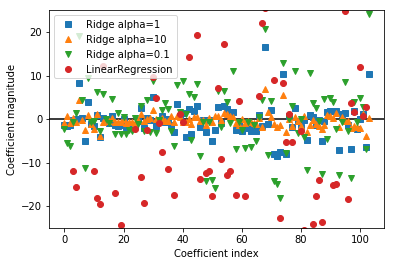

In [75]:
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")

plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-25, 25)
plt.legend()
plt.show()

The next raph shows that with more data the model tends to predict better in both the ridge and linear regressions. With enough data both models will predict jus as good.

Linear regression tends to have a better training score as it is not restricted, but it performs badly on the testing as it overfits, specially with few samples in the data.

This is modeled with alpha= 1 in Ridge. The graph shows that with an increasing sie in data, regularization becomes less important.

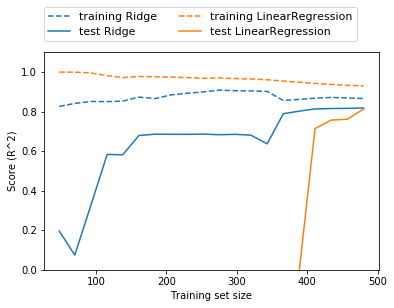

In [76]:
#Training curves for ridge regression and linear regression on the Boston Housing extended dataset
mglearn.plots.plot_ridge_n_samples()

### Lasso Regression

An alternative for ridge for regularization.

This one uses L1 norm of the coefficient vector. It penalizes the sum of the absolute values of the coefficients.

The consequence of this is that sometimes some coefficients are EXACTLY zero. This can be seen as an automatic feature selection, as it leaves only the most important features of the model.

In [77]:
from sklearn.linear_model import Lasso

X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

lasso = Lasso().fit(X_train, y_train)

print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))

print("Number of features used: ", np.sum(lasso.coef_ != 0))

Training set score: 0.29
Test set score: 0.21
Number of features used:  4


Lasso underfitted and used only 4 of the 104 features. Lasso has the regularization parameter alpha too.

High values of alpha restricts more the coefficients and restricts their values closer to zero. This decreases training set performance but MIGHT help generalization.

Low values of alpha makes the model be more similar to a normal Linear Regression as coefficientes are barely restricted. Better performance in training set but generalization MIGHT be affected.

In this case if we decrease alpha, we need to increase max_iter (the maximum number of iterations to run).

In [78]:
# We increase the default setting of "max_iter",
#Otherwise the model would warn use we should increase max_iter.

lasso001 = Lasso(alpha= 0.001, max_iter = 100000).fit(X_train, y_train)

print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))

print("Number of features used: ", np.sum(lasso001.coef_ != 0))

Training set score: 0.94
Test set score: 0.74
Number of features used:  67


If we set alpha too low then we might end up overfitting

In [79]:
# We increase the default setting of "max_iter",
#Otherwise the model would warn use we should increase max_iter.

lasso00001 = Lasso(alpha= 0.0001, max_iter = 100000).fit(X_train, y_train)

print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))

print("Number of features used: ", np.sum(lasso00001.coef_ != 0))

Training set score: 0.95
Test set score: 0.64
Number of features used:  96


Again, the higher the alpha, the lower the coefficients. In alpha= 1 most coefficients are equal to zero

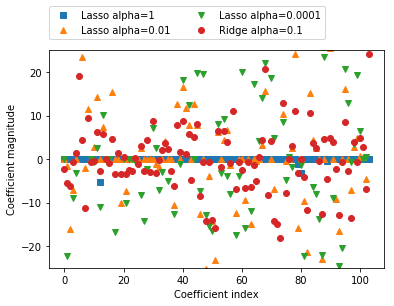

In [80]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")

plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.show()

### ElasticNet

A combination of Ridge and Lasso. It isn't covered in the book though. It penalizes the coefficients using L1 and L2

### Linear models for classification

Threshold the predicted value at 0. If lower than zero we predict class -1; if it is larger than zero then we predict class 1.

In this case, the decision boundary, the "threshold", is the linear function of the input. In other words, the model separates the classes using a line.

### Logistic Regression and SVC (Support vector classification)

C:\Users\S2G 02\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\S2G 02\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


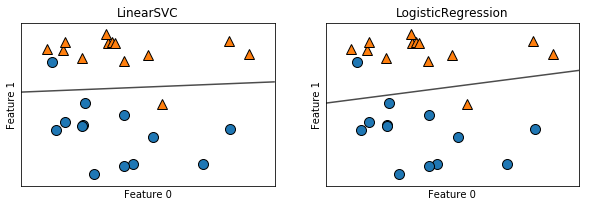

In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1,2, figsize = (10,3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X,y)
    
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps = 0.5, ax= ax, alpha= 0.7)
    
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title(clf.__class__.__name__)
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend
plt.show()

Both models take the regularization parameter C. The higher the C the less regularization and overfitting will likely appear.

If I have a high value of C then the model will try to fit the training set as best as possible.

Also, low values of C will cause the algorithms to adjust to the "majority" while high values of C will stress the important of each individual data point ot be classified correctly.

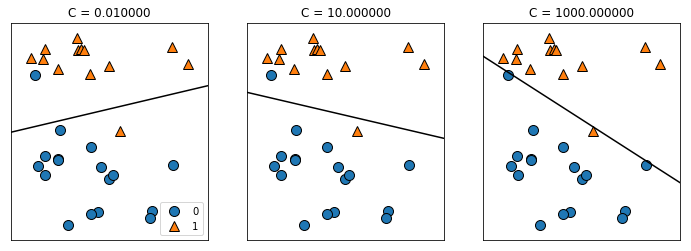

In [82]:
# Plot SVC for different values of C
mglearn.plots.plot_linear_svc_regularization()

##### Logistic Regression on breast cancer dataset

In [83]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify = cancer.target, random_state=42)

logreg = LogisticRegression().fit(X_train, y_train)

print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 0.955
Test set score: 0.958


C:\Users\S2G 02\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


As training and test performance are very similar, it is likely that we are underfitting

In [84]:
# Try with C = 100 so that the model adjusts better to the training set.

logreg100 = LogisticRegression(C=100).fit(X_train, y_train)

print("Training set score: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg100.score(X_test, y_test)))

Training set score: 0.972
Test set score: 0.965


C:\Users\S2G 02\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [85]:
# Now try with a more regularized model
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)

print("Training set score: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg001.score(X_test, y_test)))

Training set score: 0.934
Test set score: 0.930


C:\Users\S2G 02\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


#### Notes:

With a lower C the model is more regularized and therefore a lot of coefficients are close to zero (but not exactly zero).

With higher Cs the model is less regularized and so the coefficients tend to be bigger

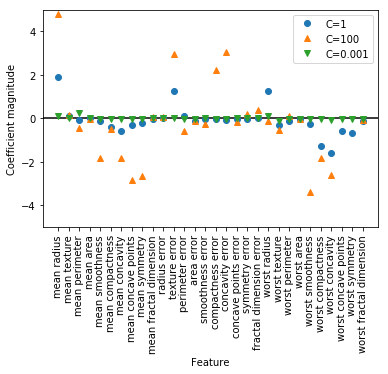

In [86]:
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-5, 5)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.legend()
plt.show()

If we see the "mean perimiter" in the previous graph, we can note that the model can yield positive or negative values for the coefficients of the same feature, which can make the model tricky to interpret

Using L1 regularization can help with this problem as it limits the features that the model uses

Training accuracy of l1 logreg with C=0.001: 0.91
Test accuracy of l1 logreg with C=0.001: 0.92
Training accuracy of l1 logreg with C=1.000: 0.96
Test accuracy of l1 logreg with C=1.000: 0.96


C:\Users\S2G 02\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Training accuracy of l1 logreg with C=100.000: 0.99
Test accuracy of l1 logreg with C=100.000: 0.98


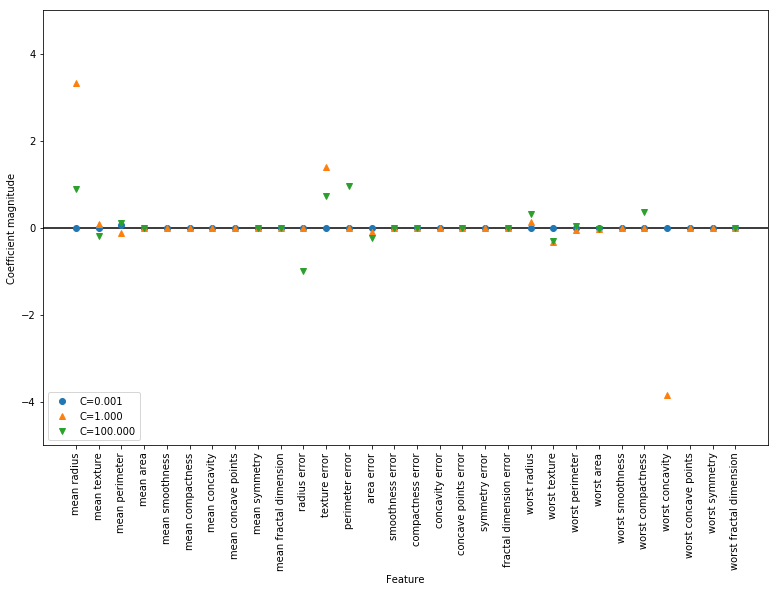

In [87]:
plt.figure(figsize=(13,8))
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, solver='liblinear', penalty="l1").fit(X_train, y_train)
    print("Training accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
          C, lr_l1.score(X_train, y_train)))
    print("Test accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
          C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)

xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")

plt.ylim(-5, 5)
plt.legend(loc=3)
plt.show()

### Linear model for multiclass classification

Usually linear models for multi-class classification are one vs. the rest. This means that several models are created for the same data and each model separates one class from the rest

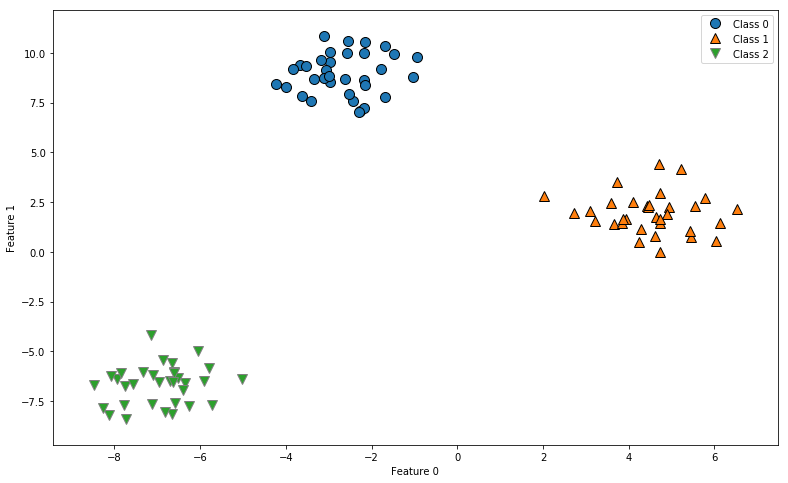

In [88]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)

plt.figure(figsize=(13,8))
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2"])
plt.show()

Now we train a LinearSVC classifier on the dataset:

In [89]:
from sklearn.svm import LinearSVC

linear_svm = LinearSVC().fit(X,y)

print("Coefficient shape: ", linear_svm.coef_.shape)
print("Intercept shape: ", linear_svm.intercept_.shape)

Coefficient shape:  (3, 2)
Intercept shape:  (3,)


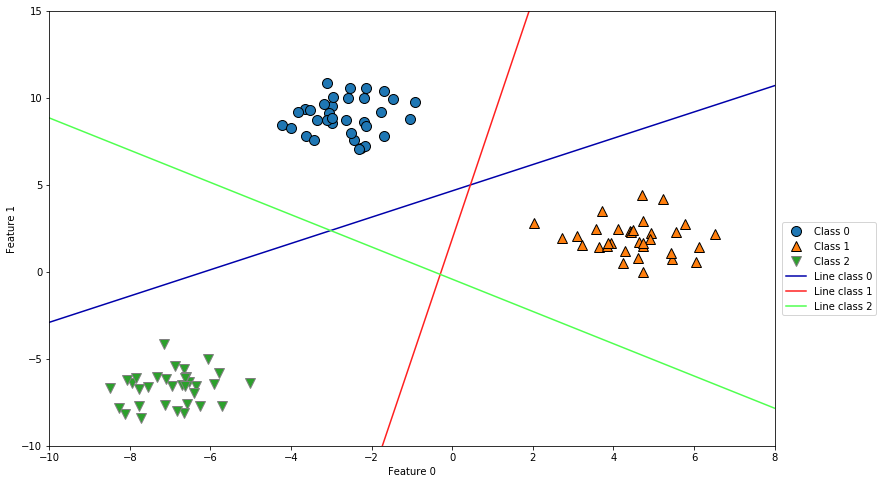

In [90]:
plt.figure(figsize =(13,8))
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                  mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
            'Line class 2'], loc=(1.01, 0.3))
plt.show()

The classification regions are presented in the following graph

Text(0, 0.5, 'Feature 1')

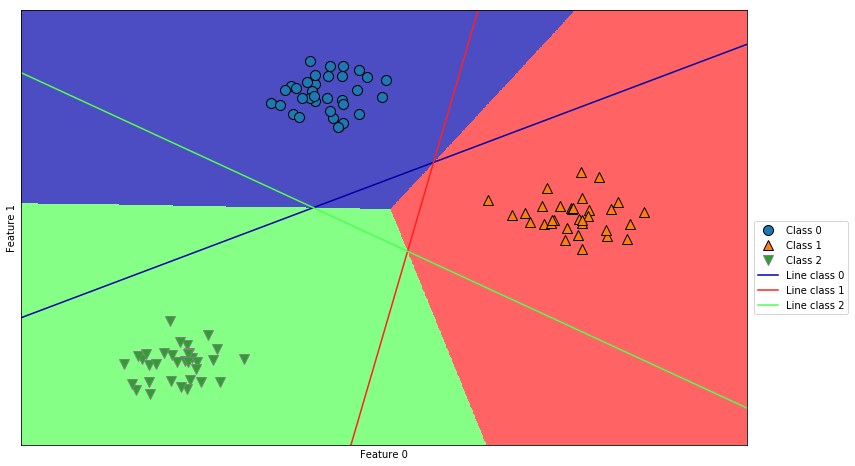

In [91]:
plt.figure(figsize =(13,8))
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                  mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
            'Line class 2'], loc=(1.01, 0.3))
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

## Naive Bayers Classifiers

Generally faster than linear classifiers, but might perform a litle worse on generalizing.

Three kinds of Bayers Classifiers in Scikit-Learn:
* GaussianNB: Any continuos data
* BernoulliNB: Assumes binary data
* MultinomialNB: Asumes count data (Each feature represents an integer count of something, like how often a word appears on a sentence)

BernoulliNB and MultinomialNB are often used in text data classification

### BernoulliNB

Counts how often every feature of each class is not zero.

For example, the first and third rows are of class 0. The first feature is never 1 with this class, so the algorithm returns zero for that feature.

The second feature happens once for the class, so the algorithm returns 1 and so on.

In [92]:
X= np.array([
    [0,1,0,1],
    [1,0,1,1],
    [0,0,0,1],
    [1,0,1,0]
])

y= np.array([0,1,0,1])

counts = {}

for label in np.unique(y):
    #Iterate over each class
    #count (sum) entries of 1 per feature
    counts[label] = X[y == label].sum(axis=0)
    
print("Feature counts:\n", counts)

Feature counts:
 {0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 1])}


MultinomialNB takes into account the average value of each feature for each class.

GaussianNB stores the average value as well as the standard deviation of each feature for each class

To make a prediction, a data point is compared to the statistics for each of the classes, and the best matching is predicted.

#### Notes:
MultinomialNB and Bernoulli NB have a single parameter, alpha, which controls model complexity. Larga alpha results in less complex models.

GaussianNB is mostly used on high-dimensional data

## Decision Trees

The goal is to make a decision asking as few if/else questions as possible.

To control the complexity we use max_depth, max_leaf_nodes or min_samples_leaf

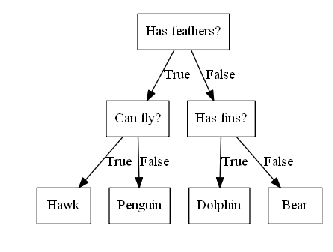

In [93]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
mglearn.plots.plot_animal_tree()

### Building decision trees

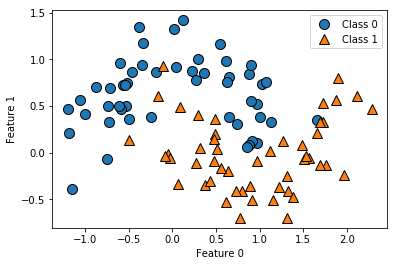

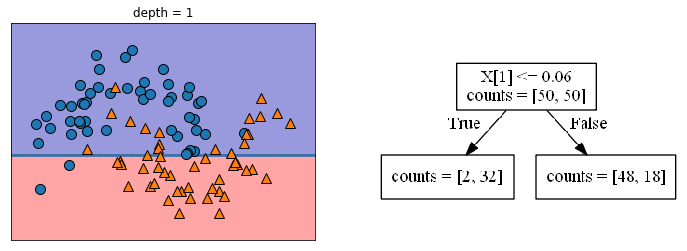

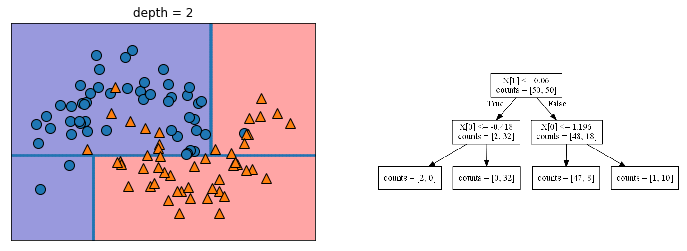

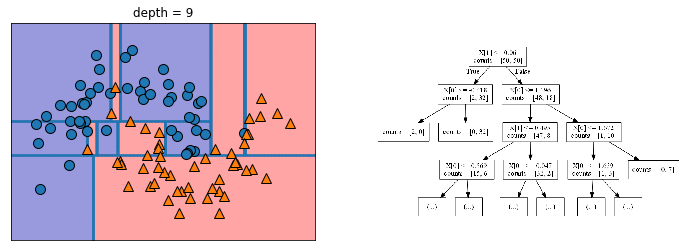

In [94]:
mglearn.plots.plot_tree_progressive()

Building a tree with many leaves might lead to overfitting as seen in the previous graphs with depth 9, in which a single point of class 0 has its strip on the right.

To prevent this one might prevent the creation of the tree earlier (pre-pruning) or removing nodes with little information after the tree is built (post-pruning or ust pruning).

Pre-pruning usually consists on limiting the maximum depth of the tree or requiring a minimum number of points in a node to split it

Scikit-learn only implements pre-pruning with DecisionTreeRegressor and DecisionTreeClassifier classes.

### Decission Tree Classifier

Breast cancer dataset

In [95]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer["data"], cancer["target"], stratify = cancer["target"],random_state=42)

tree= DecisionTreeClassifier(random_state = 0).fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.937


As expected the accuracy on the training set is 100% as the leaves are pure; the tree has grown enough to memorize all of the labels.

But the accuracy on the train set is a little worse than on the linear models seen previously, which had an accuracy of around 0.95.

If we don't prue it, the tree becomes arbitrarily complex and deep, and will likely overfit

In [96]:
# Now we pre-prune the tree to a max_depth = 4.
# Only 4 consecutive can be asked

tree = DecisionTreeClassifier(max_depth = 4, random_state = 0)
tree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.951


Now the accuracy on the training set is a bit lower, but the model performs better with the test set.


We can analyze the tree with the export_graphviz function from the tree module

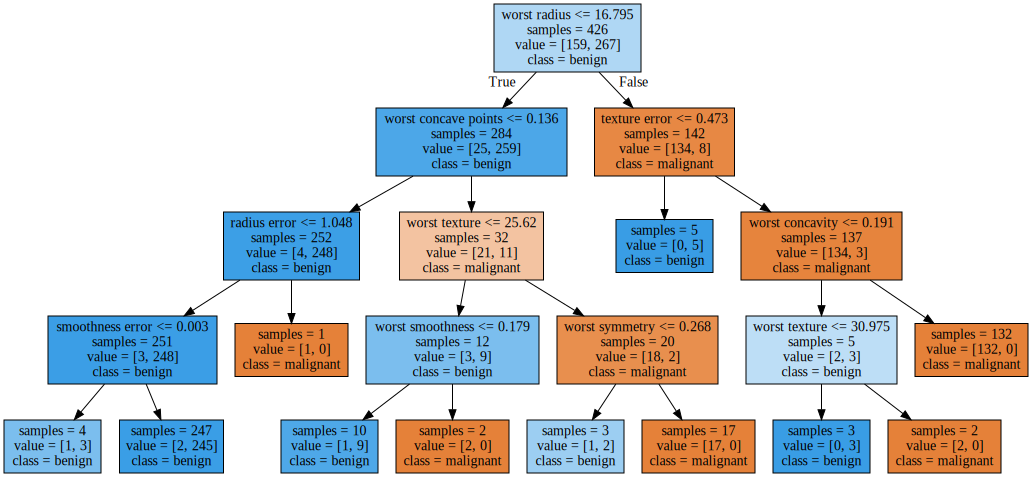

In [97]:
from sklearn.tree import export_graphviz

export_graphviz(tree, out_file="tree.dot", class_names= ["malignant", "benign"],
                feature_names = cancer["feature_names"], impurity = False, filled = True)

import graphviz
with open("tree.dot") as f:
    dot_graph= f.read()

display(graphviz.Source(dot_graph))

We can use the feature importance to determine which features help best to decide whether a sample belongs to one class or another. THe closer to one, the more important the feature is.

We can visualize the importance of the features.

In [98]:
print("Feature importances: ")
print(tree.feature_importances_)

Feature importances: 
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


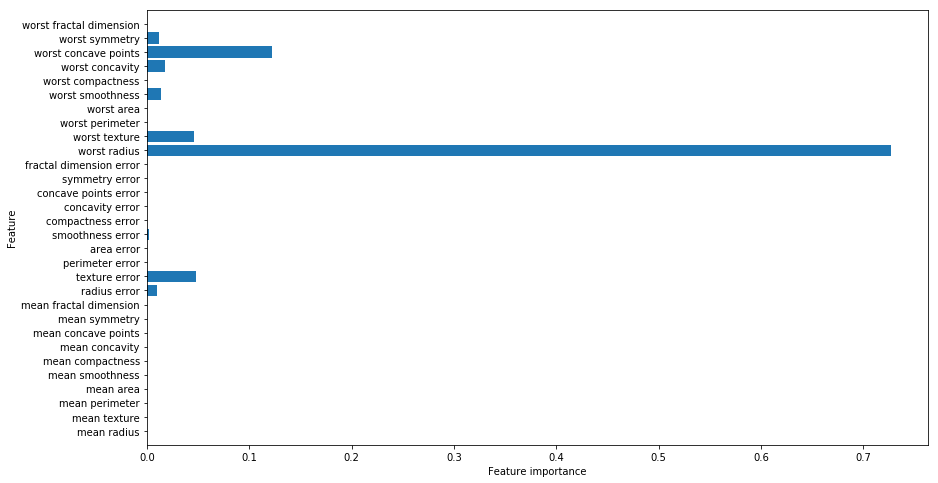

In [99]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.figure(figsize = (14,8))
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
plot_feature_importances_cancer(tree)

Worst radius is the most significant feature in the decision tree, but the importance alone can't tell us which class the feature belongs too, just that it is important.


For example, the next figures show that classes can be divided in nonmonotonous relationships. In other words, we can't say that a low value of X[1] means class 0 and a high value means class 1

Feature importances: [0. 1.]


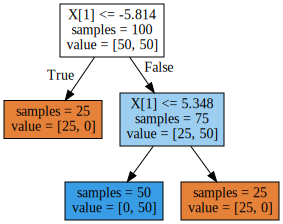

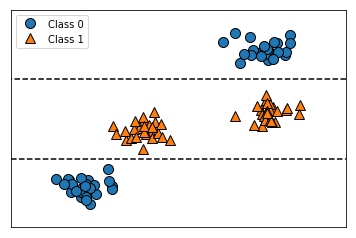

In [100]:
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)

### Decision Tree Regressor

It can't extrapolate; it can't make predictions outside the range of the training data.

Text(0, 0.5, 'Price in $/Mbyte')

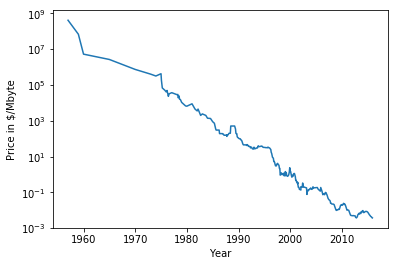

In [101]:
#RAM price example
import os
ram_prices = pd.read_csv("data/ram_price.csv")

plt.semilogy(ram_prices["date"], ram_prices["price"])
plt.xlabel("Year")
plt.ylabel("Price in $/Mbyte")

A comparison will be made between a LinearRegression Model and a TreeRegressor one

In [102]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
#Use historical data to forcast prices after the year 2000
data_train = ram_prices[ram_prices["date"] < 2000]
data_test = ram_prices[ram_prices["date"] >= 2000]

#Predict prices based on date
X_train = data_train["date"][:, np.newaxis]
#We use a log-transform to get a simpler relationship of data to target
y_train = np.log(data_train["price"])

tree = DecisionTreeRegressor(max_depth=3).fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

#Predict on all data
X_all = ram_prices["date"][:, np.newaxis]

pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

#Undo log-transform
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)



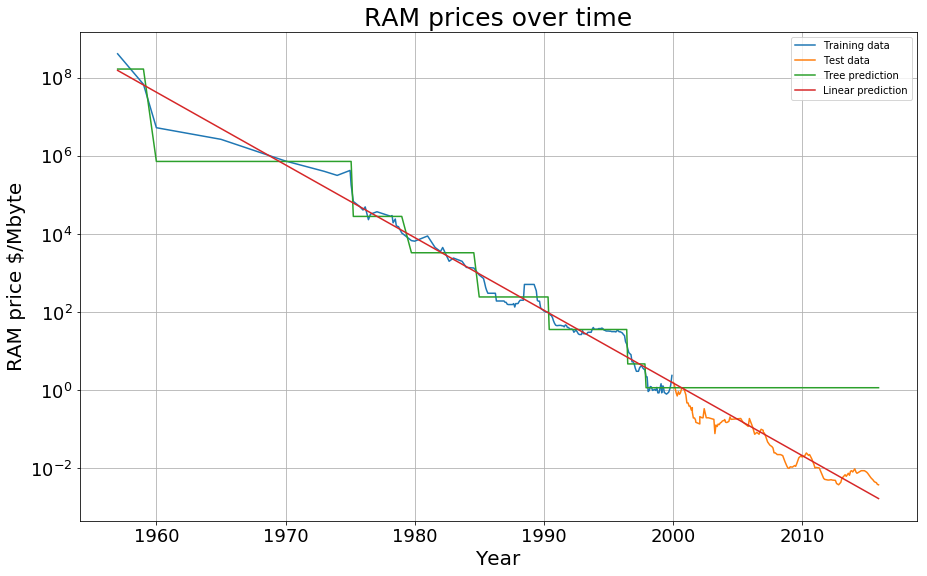

In [103]:
plt.figure(figsize= (15,9))

plt.semilogy(data_train["date"], data_train["price"], label="Training data")
plt.semilogy(data_test["date"], data_test["price"], label ="Test data")
plt.semilogy(ram_prices["date"], price_tree, label="Tree prediction")
plt.semilogy(ram_prices["date"], price_lr, label="Linear prediction")
plt.legend()
plt.xlabel("Year", size=20)
plt.ylabel("RAM price $/Mbyte", size = 20)
plt.xticks(size=18)
plt.yticks(size = 18)
plt.title("RAM prices over time", size = 25)
plt.grid(b=True)
plt.show()


The Linear model adjusts a line to the training and test datasets, making a fairly good prediction.

The Tree model, on the other hand, doesn't create a line but tries to follow the training data as best as possible, but fails to predict on the data outside the training boundaries, the years after 2000.

## Ensembles of Decision Trees

Ensembles are methos that combine multiple ML models to create more powerful models.

### Random Forests

A collecton of decison trees, where each tree is slightly different from the other, helping to prevent overfitting. If there are several trees that overfit in different ways, the average result is less overfitting (can be demonstrated with rigorous maths).

First I need to decide on the number of trees to build (n_estimators in RandomForestRegressor and RandomForestClassifier).

Then we create a bootstrap sample, taking random samples of our datasets. These samples can be repeated and the process is iterated until the random sample dataset is as big as the original dataset.

Then the algorithm starts selecting features for each node. The number of features that are selected is established by the max_features parameter.

The bootstrap sample leads to each tree being built on a slightly different dataset.

#### Improve performance:

The parameter n_jobs tells how many cores will be used on the computer to run the algorithm. To use all the cores I put n_jobs = -1.

Use max_features = sqrt(n_features) for classification and max_features =n_features for regression. They are the default values anyway.

In [104]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons
# Example with make_moons
X, y = make_moons(n_samples = 100, noise = 0.25, random_state= 3)

X_train, X_test, y_train, y_test  = train_test_split(X, y, stratify = y, random_state = 42)

forest  = RandomForestClassifier(n_estimators = 5, random_state = 2)

forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=None,
            oob_score=False, random_state=2, verbose=0, warm_start=False)

The trees generated as part of a random forest are stored in the estimator_ attribute.

Let's visualiz the decision boundaries learned by each tree.

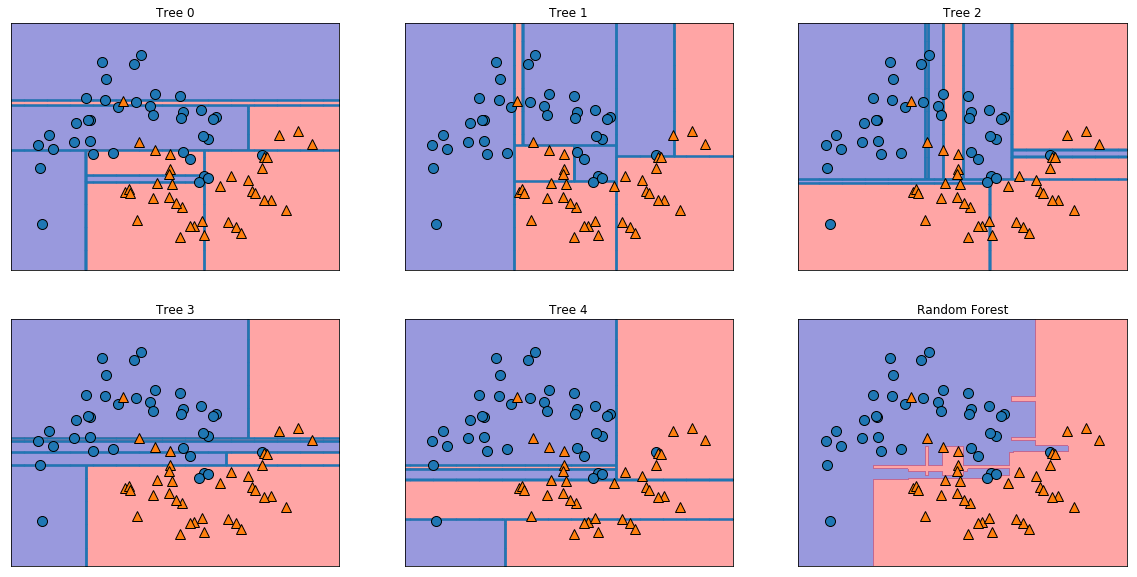

In [108]:
fig, axes =  plt.subplots(2, 3, figsize = (20,10))

for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(forest, X_train, fill=True, ax=axes[-1, -1],
                                alpha=.4)
axes[-1, -1].set_title("Random Forest")
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

plt.show()

In [109]:
#Example with Breast cancer
from sklearn.datasets import load_breast_cancer
X_train, X_test, y_train, y_test = train_test_split(cancer["data"], cancer["target"], random_state= 0)

forest = RandomForestClassifier(n_estimators = 100, random_state= 0).fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.972


Feature importances returned by a random forest are usually more reliable than those of a single tree. The random forest gives a muc broader picture of the effects of the features

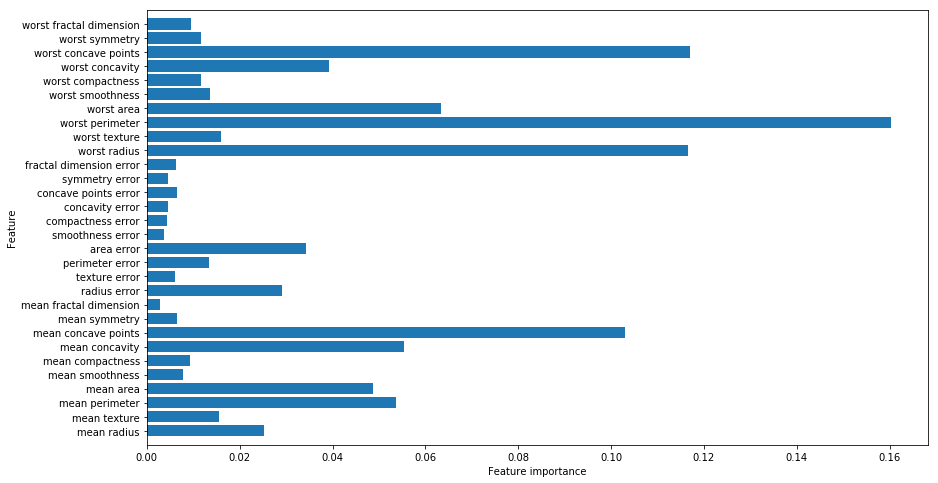

In [110]:
plot_feature_importances_cancer(forest)

### Gradient Boosted Regresion Trees (Gradient boosting machines)

Builds different trees in series, where each new tree tries to correct the mistakes of the previous one.

Instead of randomization, the trees are stronly pre-puned before training the models.

Gradient Boosted trees often use shallow trees, of depth one to five, which makes the model smaller in terms of memory and also faster.

The main idea behind gradient boosting is to combine many simple models (weak learners) like shallow trees.

Gradient boosted trees are frequently the winners of competitions and are widely used in industry.

#### Note:

learning_rate parameter is used to control how strongly each new tree tries to correct the mistakes of the previos trees. A high learning rate means it makes stronger corrections.

Increasing n_estimators also increases the model complexity, as the model has more chances to correct mistakes on the training set.

For large scale problems it is better to apply xgboost than scikit-learn

In [127]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import GradientBoostingClassifier
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer["data"], cancer["target"], random_state = 0)

gbrt = GradientBoostingClassifier(random_state = 0).fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))


Accuracy on training set: 1.000
Accuracy on test set: 0.958


An accuracy of 1 in training set might indicate overfitting.

Let's apply stronger pre-pruning or lower the learning rate

In [128]:
#Apply stronger pre-pruning
gbrt = GradientBoostingClassifier(random_state = 0, max_depth = 1).fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))


Accuracy on training set: 0.991
Accuracy on test set: 0.972


In [129]:
# Lower the learning rate
gbrt = GradientBoostingClassifier(random_state = 0, learning_rate = 0.01).fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))


Accuracy on training set: 0.988
Accuracy on test set: 0.965


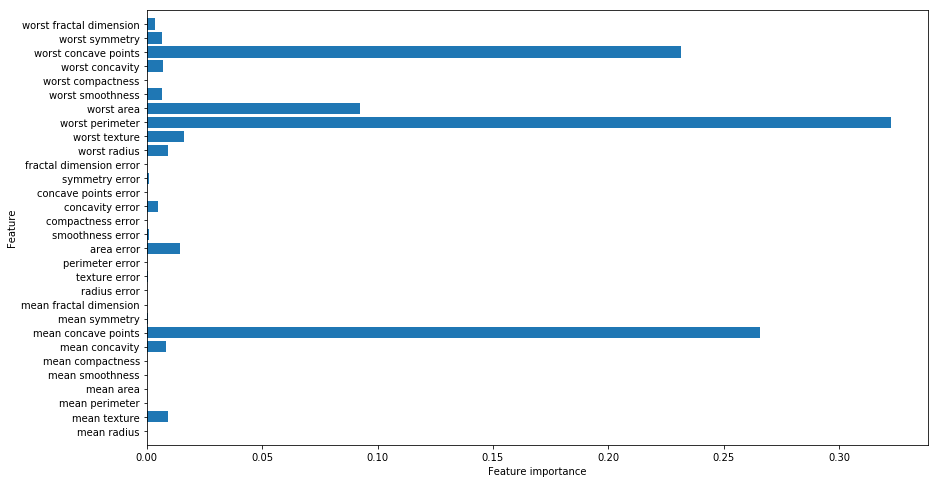

In [133]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

plot_feature_importances_cancer(gbrt)

## Kernelized Support Vector Machines

This version of SVM allow more complex classification than just hyperplanes.

In the next example, a line won't be able to separte the classes correctly.

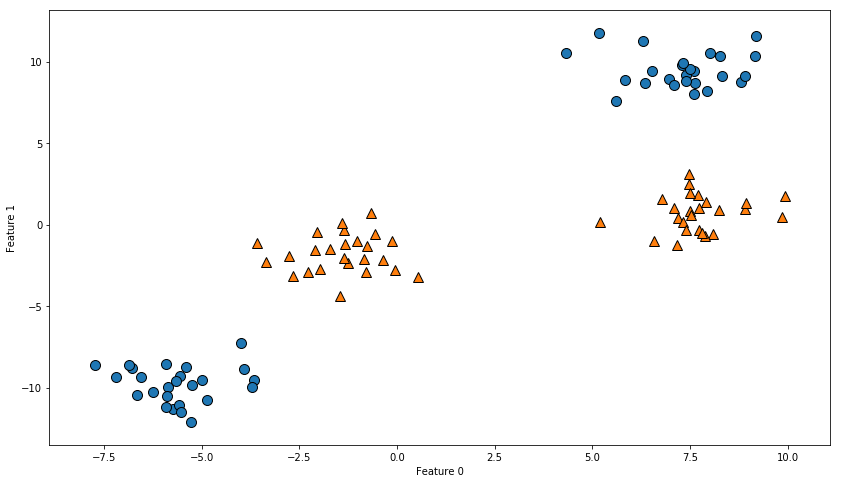

In [2]:
from sklearn.datasets import make_blobs
X,y  = make_blobs(centers = 4, random_state = 8)
y = y%2
plt.figure(figsize = (14,8))
mglearn.discrete_scatter(X[:, 0], X[:,1], y)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.show()

C:\Users\luisc\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


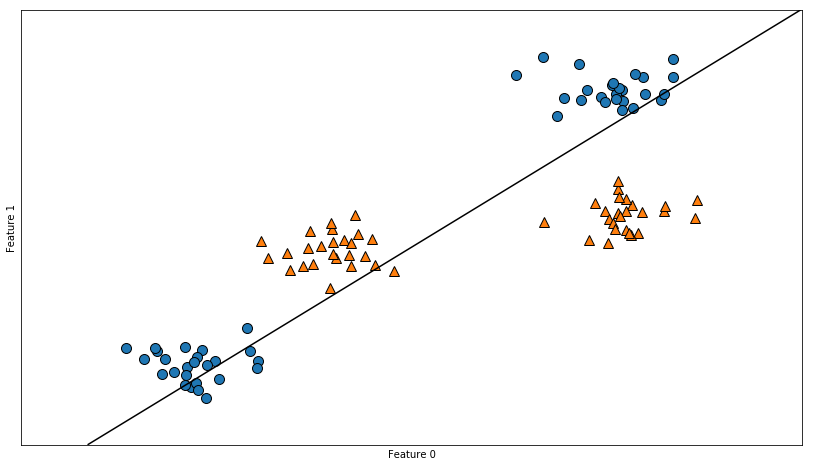

In [3]:
from sklearn.svm import LinearSVC

linear_svm = LinearSVC().fit(X,y)

plt.figure(figsize = (14,8))
mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:, 0], X[:,1], y)

plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.show()

Now let's expand the set of input features by adding feature1 ** 2 in order to be able to separate the two classes like absolute madmen.

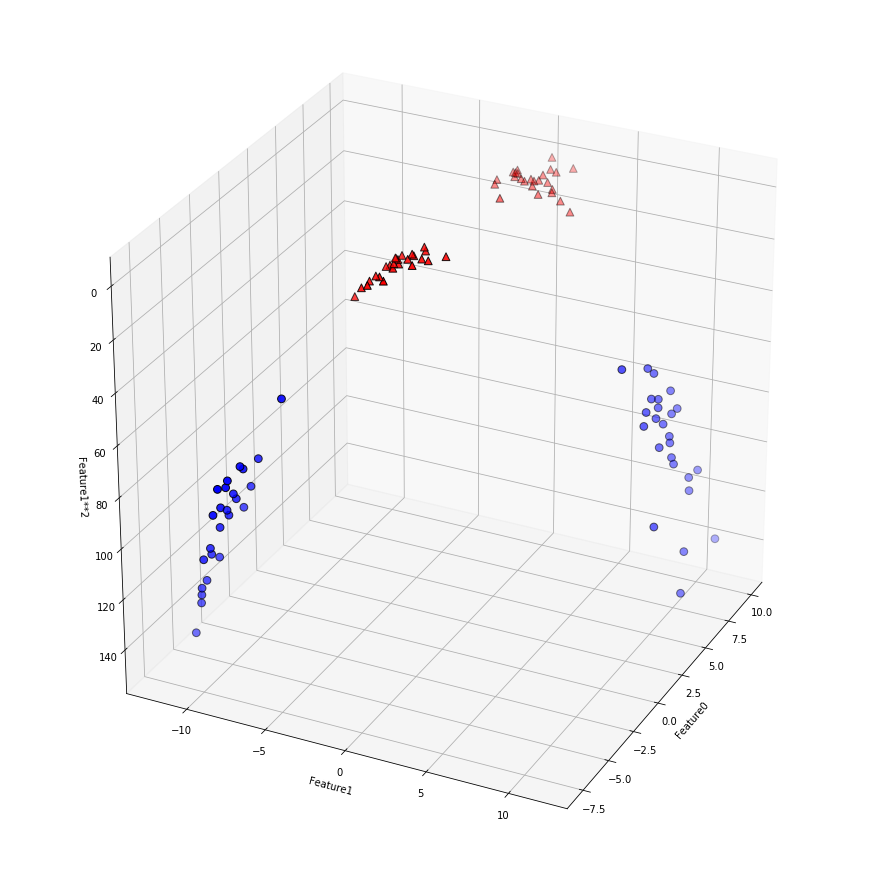

In [4]:
X_new = np.hstack([X, X[:,1:]**2])

from mpl_toolkits.mplot3d import Axes3D, axes3d

figure = plt.figure(figsize = (12,12))

#Visualize in 3D
ax = Axes3D(figure, elev = -152, azim = -26)

#Plot first all the piints with y==0, then all with y ==1

mask = y==0

ax.scatter(X_new[mask, 0], X_new[mask,1], X_new[mask,2], c = 'b', cmap = mglearn.cm2, s = 60, edgecolor = 'k')
ax.scatter(X_new[~mask, 0], X_new[~mask,1], X_new[~mask,2], c = 'r', marker = '^', cmap = mglearn.cm2, s = 60, edgecolor = 'k')

ax.set_xlabel("Feature0")
ax.set_ylabel("Feature1")
ax.set_zlabel("Feature1**2")

plt.show()

Now we proceed to create a plane that separates the classes

C:\Users\luisc\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


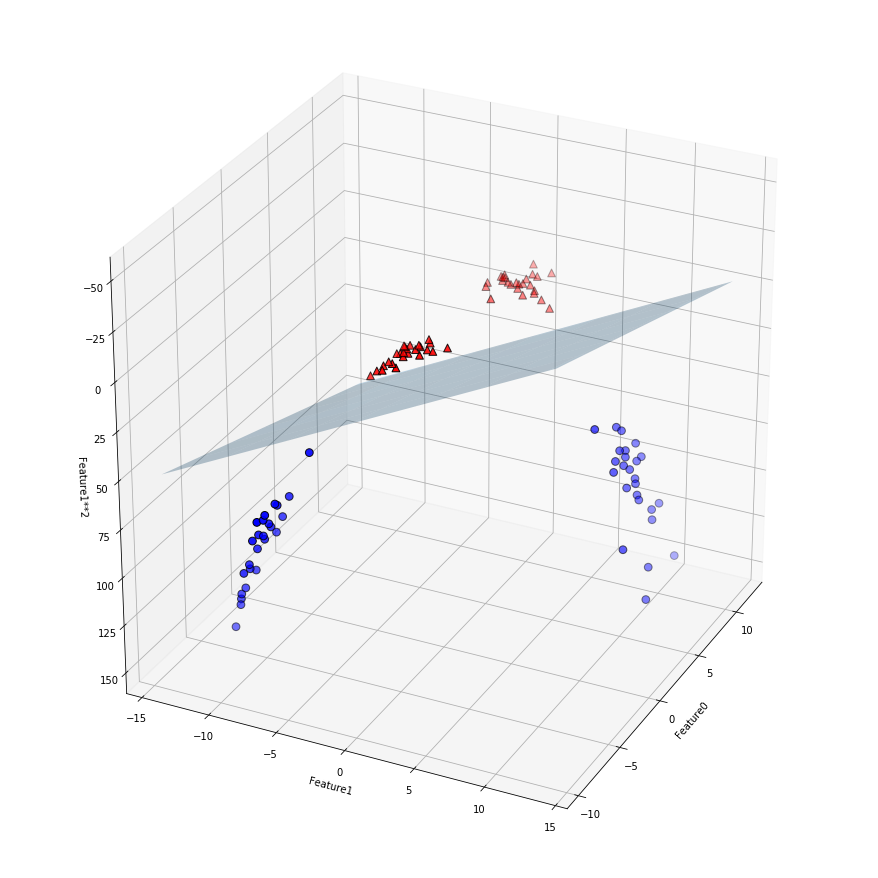

In [6]:
linear_svm_3d = LinearSVC().fit(X_new, y)

coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

# show linear decision boundary
figure = plt.figure(figsize  = (12,12))
ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)

XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]

ax.plot_surface(XX, YY, ZZ, rstride = 8, cstride = 8, alpha = 0.3)

ax.scatter(X_new[mask, 0], X_new[mask,1], X_new[mask,2], c = 'b', cmap = mglearn.cm2, s = 60, edgecolor = 'k')
ax.scatter(X_new[~mask, 0], X_new[~mask,1], X_new[~mask,2], c = 'r', marker = '^', cmap = mglearn.cm2, s = 60, edgecolor = 'k')


ax.set_xlabel("Feature0")
ax.set_ylabel("Feature1")
ax.set_zlabel("Feature1**2")

plt.show()

The decision boundary is not linear anymore. Adding nonlinear features to the representation of our data can make models much more powerful

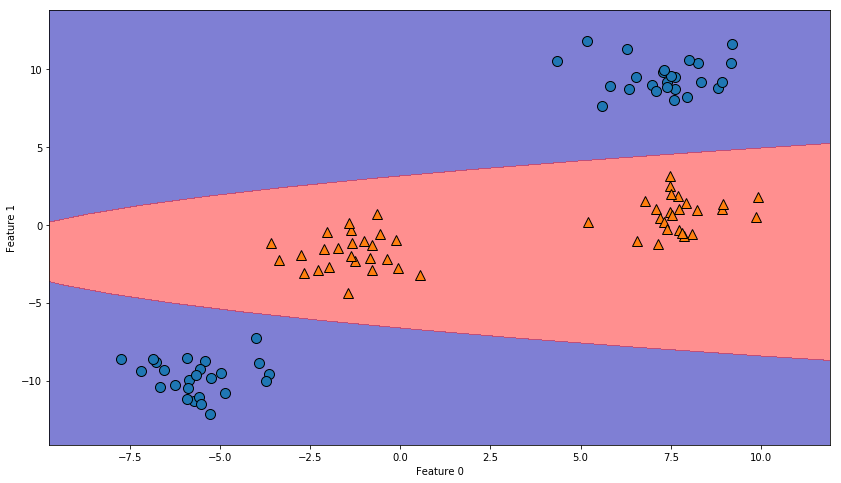

In [11]:
ZZ = YY ** 2

plt.figure(figsize  = (14,8))
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()],
             cmap=mglearn.cm2, alpha=0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

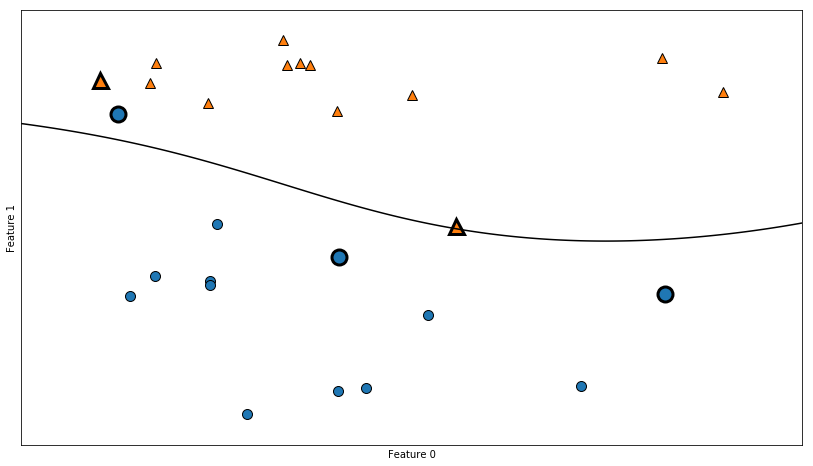

In [13]:
from sklearn.svm import SVC

X, y = mglearn.tools.make_handcrafted_dataset()                                                                  
svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X, y)
plt.figure(figsize = (14,8))
mglearn.plots.plot_2d_separator(svm, X, eps=.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
# plot support vectors
sv = svm.support_vectors_
# class labels of support vectors are given by the sign of the dual coefficients
sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=3)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

During training, the SVM learns how important each of the training data points is to represent the location of the decision boundary. Typically, only a subset of the training points matter for defining the decision boundary: the ones that lie on the border between the classes.

Now, let's look at the two parameters used to tune the SVM

* Gamma: Determines how far the influence of a single training example reaches, with low values corresponding to a far reach.
* C paramater: It limits the importance of each point

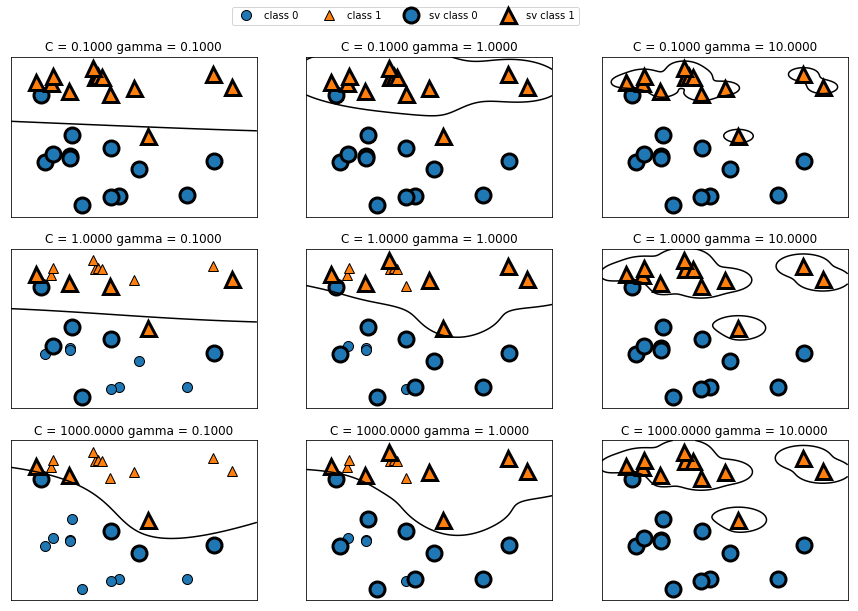

In [15]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)
        
axes[0, 0].legend(["class 0", "class 1", "sv class 0", "sv class 1"],
                  ncol=4, loc=(.9, 1.2))
plt.show()

Refering to the images above.

Gamma increases from left to right and c from top to bottom.

A small gamma means a large radius for the Gaussian kernel, which means that many points are considered close by, this is reflected in a very smooth decision boundaries on the left. On the right the decision boundaries focus more on a single point.

A small C means a very restricted model, where each data point has a limited influence. Increasing C means that each of the missclassified points on the top left will have a stronger influence on the decision boundary.